# FIFA 2020
## Searching the best team
![](https://megaobzor.com/uploads/stories/153117/p1_2606755_2c85697d.jpg)

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("/kaggle/input/fifa-20-complete-player-dataset/players_20.csv")

In [ ]:
pip install chart_studio

# Data Preview
Version 1: Basics. 15.06.2020

Version 2: Updated best goal keeper + new methods to pick best players. 16.06.2020

Version 3: Soon

## Player nationalities

In [ ]:
nations = data['nationality'].value_counts()

other_nations = (data['nationality'].value_counts() < np.mean(nations.values))
data['nationality'] = data['nationality'].apply(lambda x: 'Others' if other_nations.loc[x] == True else x)

fig = px.pie(data, names="nationality")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Preferred foot

In [ ]:
fig = px.pie(data, names='preferred_foot')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Real bodies and faces

### Total bodies

In [ ]:
data['body_type'].value_counts()

fig = px.pie(data, names='body_type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Unique bodies

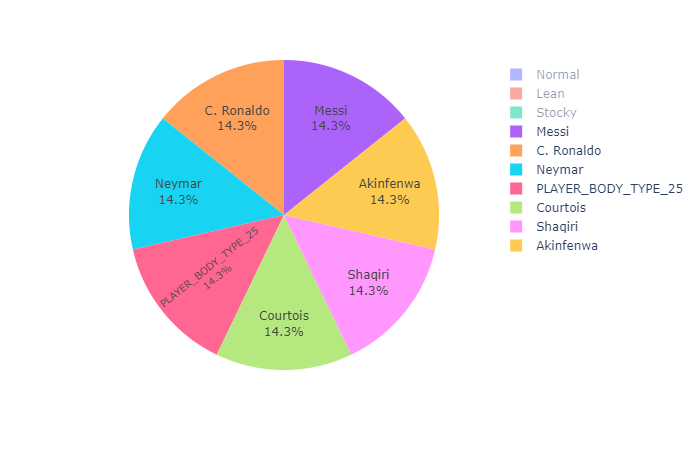

### Proportion of unique faces

In [ ]:
fig = px.pie(data, names='real_face')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Distribution plot: Age, Weight, Height

In [ ]:
import chart_studio.plotly as py
import plotly.figure_factory as ff

df_head = (data.sort_values(by='age', ascending=False)).head(10)
cols = ['short_name', 'age','nationality', 'club']
table = ff.create_table(df_head[cols])
table.show()

df_head = (data.sort_values(by='age', ascending=True)).head(10)
cols = ['short_name', 'age','nationality', 'club']
table = ff.create_table(df_head[cols])
table.show()

In [ ]:
plt.figure(figsize=(15,8))

age = data['age']
fig = px.histogram(age,marginal="box")
fig.show()

height = data['height_cm']
fig = px.histogram(height,marginal="box")
fig.show()

weight = data['weight_kg']
fig = px.histogram(weight,marginal="box")
fig.show()

## Overall vs Potential scores

In [ ]:
df_head = (data.sort_values(by='overall', ascending=False)).head(10)
cols = ['short_name', 'overall']
table = ff.create_table(df_head[cols])
table.show()

df_head = (data.sort_values(by='potential', ascending=False)).head(10)
cols = ['short_name', 'potential']
table = ff.create_table(df_head[cols])
table.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data['overall'],bins=45)
sns.distplot(data['potential'], bins=45)
plt.legend(["overall score", "potential score"])
plt.show()

## Wages, values

### Top 10 valuable players

In [ ]:
df_head = (data.sort_values(by='value_eur', ascending=False)).head(10)
cols = ['short_name', 'value_eur']
table = ff.create_table(df_head[cols])
table.show()

### Top 10 wageable players

In [ ]:
df_head = (data.sort_values(by='wage_eur', ascending=False)).head(10)
cols = ['short_name', 'wage_eur']
table = ff.create_table(df_head[cols])
table.show()

# Data Analysis

## Overall

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x=data['value_eur'],y=data['wage_eur'],
            scatter_kws={'color':'black','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'red','alpha':0.8})
plt.title("Value/Wage proportion")

### Distribution by overall scores

In [ ]:
fig = px.scatter_3d(data, x='wage_eur', y='value_eur', z='overall',
              color='overall', hover_name="short_name")
fig.show()

### Distribution by potential scores (names)

In [ ]:
fig = px.scatter_3d(data, x='wage_eur', y='value_eur', z='overall',
              color='potential', hover_name="short_name")
fig.show()

### Distribution by potential scores (positions)

In [ ]:
fig = px.scatter_3d(data, x='wage_eur', y='value_eur', z='overall',
              color='potential', hover_name="player_positions")
fig.show()

## Search best players

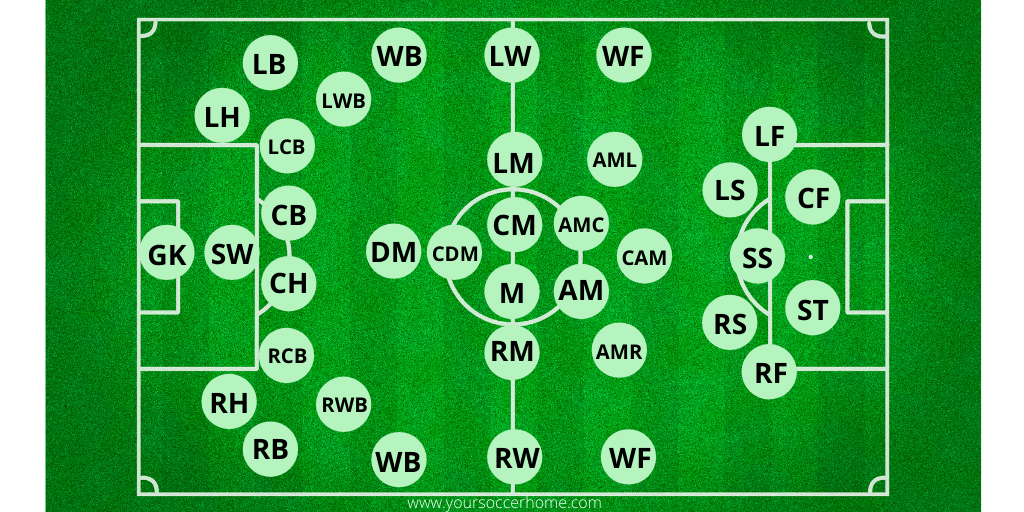

### Naive and straight method
Let's choose players by their best positions

In [ ]:
def search_bests(cols):
    
    team = []
    
    for i in cols:
        df = data.sort_values(by=i, ascending=False).head(12)
        for j in range(0,12):
            name = df.iloc[j]['short_name']
            overall = df.iloc[j]['overall']
            foot = df.iloc[j]['preferred_foot']
            pos = df.iloc[j]['team_position']
            arr = (name, overall, foot, pos)
            if arr not in team:
                team.append(arr)
                break
                
    return team

import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Boisko.svg/1200px-Boisko.svg.png')
imgplot = plt.imshow(img)

cols = ["ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm",
            "lcm","cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb"]

xy = [(400,300), (800,200), (800,300), (150,850), (200,270), (400,200), (1050,270), (1050,850), (400,750), (600,700),
      (800,750), (300,950), (400,850), (600,900), (800,850), (900,950), (300,1250), (400,1100), (600,1000), 
      (800,1100), (900,1250), (200,1400), (400,1475), (600,1550), (800,1475), (1000,1400),(600,1700)]

team = search_bests(cols)

cols.append("gk")
xy.append((1700,650))

#find the best goal keeper
data['gk_score'] = (data['gk_reflexes'] + data['gk_handling'] + data['gk_positioning'])/3
df = data.sort_values(by="gk_score", ascending=False).head(1)
df = df.iloc[0]
team.append((df['short_name'], df['overall'],df['preferred_foot'],df['team_position']))

for i in range(len(team)):
    plt.text(xy[i][0]-120, xy[i][1]+20,cols[i] + ":" + team[i][0] + "(" +str(team[i][1]) + ")\nfoot " + team[i][2], fontsize=12,
            bbox={'facecolor': 'white', 'alpha': 0.5})

### Best Overall Method(17 players)

In [ ]:
def search_bests_overall():
    
    fws = ["LS","ST","RS", "LF" ,"CF","RF"]
    cnts = ["LW","LAM","CAM","RAM","RW"]
    dfs = ["LB","LCB","CB","RCB","RB"]
    
    ar1 = []
    ar2 = []
    ar3 = []
    
    team = []
    
    df = data.sort_values(by="overall", ascending=False).head(100)
    for j in range(100):
        name = df.iloc[j]['short_name']
        overall = df.iloc[j]['overall']
        foot = df.iloc[j]['preferred_foot']
        pos = df.iloc[j]['team_position']
        arr = (name, overall, foot, pos)
        
        if pos in fws and len(ar1) < 6:
            ar1.append(arr)
        elif pos in cnts and len(ar2) < 5:
            ar2.append(arr)
        elif pos in dfs and len(ar3) < 5:
            ar3.append(arr)
            
    team.extend(ar1)
    team.extend(ar2)
    team.extend(ar3)
                
    return team

import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Boisko.svg/1200px-Boisko.svg.png')
imgplot = plt.imshow(img)

cols = ["ls","st","rs", "lf" ,"cf","rf",
        "lw","lam","cam","ram","rw",
        "lb","lcb","cb","rcb","rb"]

xy = [(370,300), (600,200), (830,300), (150,270), (600,270), (1050,270),
      (200,800), (400,900), (600,1000), (800,900), (1000,800),
      (200,1275), (400,1350), (600,1425), (800,1350),(1000,1275)]

team = search_bests_overall()

cols.append("gk")
xy.append((650,1700))

#find the best goal keeper
data['gk_score'] = (data['gk_reflexes'] + data['gk_handling'] + data['gk_positioning'])/3
df = data.sort_values(by="gk_score", ascending=False).head(1)
df = df.iloc[0]
team.append((df['short_name'], df['overall'],df['preferred_foot'],df['team_position']))

for i in range(len(team)):
    plt.text(xy[i][0]-120, xy[i][1]+20,cols[i] + ":" + team[i][0] + "(" +str(team[i][1]) + ")\nfoot " + team[i][2], fontsize=12,
            bbox={'facecolor': 'white', 'alpha': 0.5})

### Best Potential Method(17 Players)

In [ ]:
def search_bests_potential():
    
    fws = ["LS","ST","RS", "LF" ,"CF","RF"]
    cnts = ["LW","LAM","CAM","RAM","RW"]
    dfs = ["LB","LCB","CB","RCB","RB"]
    
    ar1 = []
    ar2 = []
    ar3 = []
    
    team = []
    
    df = data.sort_values(by="potential", ascending=False).head(100)
    for j in range(100):
        name = df.iloc[j]['short_name']
        overall = df.iloc[j]['potential']
        foot = df.iloc[j]['preferred_foot']
        pos = df.iloc[j]['team_position']
        arr = (name, overall, foot, pos)
        
        if pos in fws and len(ar1) < 6:
            ar1.append(arr)
        elif pos in cnts and len(ar2) < 5:
            ar2.append(arr)
        elif pos in dfs and len(ar3) < 5:
            ar3.append(arr)
            
    team.extend(ar1)
    team.extend(ar2)
    team.extend(ar3)
                
    return team

import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Boisko.svg/1200px-Boisko.svg.png')
imgplot = plt.imshow(img)

cols = ["ls","st","rs", "lf" ,"cf","rf",
        "lw","lam","cam","ram","rw",
        "lb","lcb","cb","rcb","rb"]

xy = [(370,300), (600,200), (830,300), (150,270), (600,270), (1050,270),
      (200,800), (400,900), (600,1000), (800,900), (1000,800),
      (200,1275), (400,1350), (600,1425), (800,1350),(1000,1275)]

team = search_bests_potential()

cols.append("gk")
xy.append((650,1700))

#find the best goal keeper
data['gk_score'] = (data['gk_reflexes'] + data['gk_handling'] + data['gk_positioning'])/3
df = data.sort_values(by="gk_score", ascending=False).head(1)
df = df.iloc[0]
team.append((df['short_name'], df['potential'],df['preferred_foot'],df['team_position']))

for i in range(len(team)):
    plt.text(xy[i][0]-120, xy[i][1]+20,cols[i] + ":" + team[i][0] + "(" +str(team[i][1]) + ")\nfoot " + team[i][2], fontsize=12,
            bbox={'facecolor': 'white', 'alpha': 0.5})

### Fastest Players Method(17 Players)

In [ ]:
def search_bests_fastest():
    
    fws = ["LS","ST","RS", "LF" ,"CF","RF"]
    cnts = ["LW","LAM","CAM","RAM","RW"]
    dfs = ["LB","LCB","CB","RCB","RB"]
    
    ar1 = []
    ar2 = []
    ar3 = []
    
    team = []
    
    df = data.sort_values(by="movement_sprint_speed", ascending=False).head(100)
    for j in range(100):
        name = df.iloc[j]['short_name']
        overall = df.iloc[j]['overall']
        foot = df.iloc[j]['preferred_foot']
        pos = df.iloc[j]['team_position']
        arr = (name, overall, foot, pos)
        
        if pos in fws and len(ar1) < 6:
            ar1.append(arr)
        elif pos in cnts and len(ar2) < 5:
            ar2.append(arr)
        elif pos in dfs and len(ar3) < 5:
            ar3.append(arr)
            
    team.extend(ar1)
    team.extend(ar2)
    team.extend(ar3)
                
    return team

import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Boisko.svg/1200px-Boisko.svg.png')
imgplot = plt.imshow(img)

cols = ["ls","st","rs", "lf" ,"cf","rf",
        "lw","lam","cam","ram","rw",
        "lb","lcb","cb","rcb","rb"]

xy = [(370,300), (600,200), (830,300), (150,270), (600,270), (1050,270),
      (200,800), (400,900), (600,1000), (800,900), (1000,800),
      (200,1275), (400,1350), (600,1425), (800,1350),(1000,1275)]

team = search_bests_fastest()

cols.append("gk")
xy.append((650,1700))

#find the best goal keeper
data['gk_score'] = (data['gk_reflexes'] + data['gk_handling'] + data['gk_positioning'])/3
df = data.sort_values(by="gk_score", ascending=False).head(1)
df = df.iloc[0]
team.append((df['short_name'], df['overall'],df['preferred_foot'],df['team_position']))

for i in range(len(team)):
    plt.text(xy[i][0]-120, xy[i][1]+20,cols[i] + ":" + team[i][0] + "(" +str(team[i][1]) + ")\nfoot " + team[i][2], fontsize=12,
            bbox={'facecolor': 'white', 'alpha': 0.5})

### Most Dribbling Players Method(17 Players)

In [ ]:
def search_bests_dribbling():
    
    fws = ["LS","ST","RS", "LF" ,"CF","RF"]
    cnts = ["LW","LAM","CAM","RAM","RW"]
    dfs = ["LB","LCB","CB","RCB","RB"]
    
    ar1 = []
    ar2 = []
    ar3 = []
    
    team = []
    
    df = data.sort_values(by="dribbling", ascending=False).head(100)
    for j in range(100):
        name = df.iloc[j]['short_name']
        overall = df.iloc[j]['overall']
        foot = df.iloc[j]['preferred_foot']
        pos = df.iloc[j]['team_position']
        arr = (name, overall, foot, pos)
        
        if pos in fws and len(ar1) < 6:
            ar1.append(arr)
        elif pos in cnts and len(ar2) < 5:
            ar2.append(arr)
        elif pos in dfs and len(ar3) < 5:
            ar3.append(arr)
            
    team.extend(ar1)
    team.extend(ar2)
    team.extend(ar3)
                
    return team

import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Boisko.svg/1200px-Boisko.svg.png')
imgplot = plt.imshow(img)

cols = ["ls","st","rs", "lf" ,"cf","rf",
        "lw","lam","cam","ram","rw",
        "lcb","rcb"]

xy = [(370,300), (600,200), (830,300), (150,270), (600,270), (1050,270),
      (200,800), (400,900), (600,1000), (800,900), (1000,800), (400,1350), (800,1350)]

team = search_bests_dribbling()

cols.append("gk")
xy.append((650,1700))

#find the best goal keeper
data['gk_score'] = (data['gk_reflexes'] + data['gk_handling'] + data['gk_positioning'])/3
df = data.sort_values(by="gk_score", ascending=False).head(1)
df = df.iloc[0]
team.append((df['short_name'], df['overall'],df['preferred_foot'],df['team_position']))

for i in range(len(team)):
    plt.text(xy[i][0]-120, xy[i][1]+20,cols[i] + ":" + team[i][0] + "(" +str(team[i][1]) + ")\nfoot " + team[i][2], fontsize=12,
            bbox={'facecolor': 'white', 'alpha': 0.5})

### My method 1
I will take best next players in different parametres: 1 in attacking crossing, 1 - attacking finishing, 2 - attacking short passing, 2 - skill dribbling, 1 - skill long passing
2 - defending standing tackle, 1 defending sliding tackle, 1 gk

In [ ]:
def search_players1():
    
    cols = ['attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'attacking_short_passing','skill_dribbling',
           'skill_dribbling','skill_long_passing','defending_standing_tackle','defending_standing_tackle','defending_sliding_tackle']
    team = []
    
    for i in cols:
        df = data.sort_values(by=i, ascending=False).head(15)
        for j in range(0,15):
            name = df.iloc[j]['short_name']
            overall = df.iloc[j]['overall']
            foot = df.iloc[j]['preferred_foot']
            pos = df.iloc[j]['team_position']
            arr = (name, overall, foot, pos)
            if arr not in team:
                team.append(arr)
                break
                
    return team

cols = ['attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'attacking_short_passing','skill_dribbling',
           'skill_dribbling','skill_long_passing','defending_standing_tackle','defending_standing_tackle','defending_sliding_tackle']
team = search_players1()

cols.append("gk")

#find the best goal keeper
data['gk_score'] = (data['gk_reflexes'] + data['gk_handling'] + data['gk_positioning'])/3
df = data.sort_values(by="gk_score", ascending=False).head(1)
df = df.iloc[0]
team.append((df['short_name'], df['overall'],df['preferred_foot'],df['team_position']))

team

df_head = pd.DataFrame()
df_head['player'] = team
df_head['feature'] = cols

table = ff.create_table(df_head)
table.show()

In [ ]:
xy = [(400,250), (600,150), (225,650), (775,650), (225,450), (775,450),
       (600,1000), (300,1350), (600,1200), (900,1350),(650,1700)]

plt.figure(figsize=(15,15))
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Boisko.svg/1200px-Boisko.svg.png')
imgplot = plt.imshow(img)

for i in range(len(team)):
    plt.text(xy[i][0]-150, xy[i][1]+20,cols[i] + ":" + team[i][0] + "(" +str(team[i][1]) + ")\nfoot " + team[i][2], fontsize=12,
            bbox={'facecolor': 'white', 'alpha': 0.5})